env: TF_CPP_MIN_LOG_LEVEL=2


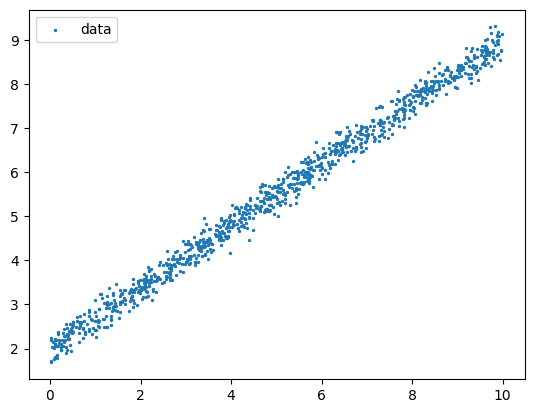

In [20]:
%env TF_CPP_MIN_LOG_LEVEL=2

import tensorflow as tf  # noqa: E402
import matplotlib.pyplot as plt  # noqa: E402
import numpy as np  # noqa: E402

TOTAL_POINTS = 1000

x = tf.random.uniform(shape=[TOTAL_POINTS], minval=0, maxval=10)
noise = tf.random.normal(shape=[TOTAL_POINTS], stddev=0.2)

k_true = 0.7
b_true = 2.0

y = x * k_true + b_true + noise

plt.scatter(x, y, s=2, label="data")
plt.legend()

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7047023>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9747714>


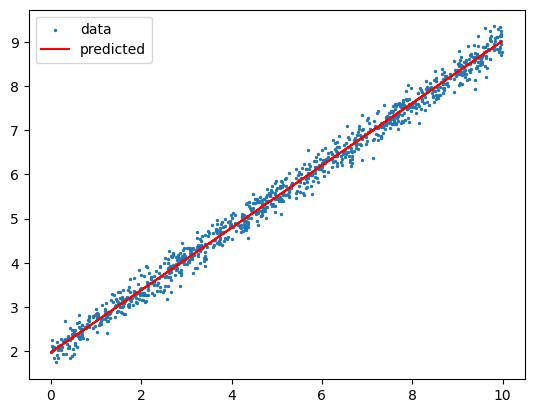

In [16]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

EPOCHS = 500
LEARNING_RATE = 0.02

for _ in range(EPOCHS):
    with tf.GradientTape() as tape:
        f = x * k + b
        loss = tf.reduce_mean(tf.square( y - f ))
    dk, db = tape.gradient(loss, [k, b])
    k.assign_sub(dk * LEARNING_RATE)
    b.assign_sub(db * LEARNING_RATE)

print(k, b, sep="\n")

y_pr = x * k + b
plt.scatter(x, y, s=2, label="data")
plt.plot(x, y_pr, color="r", label="predicted")
plt.legend()

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.70077616>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0003514>


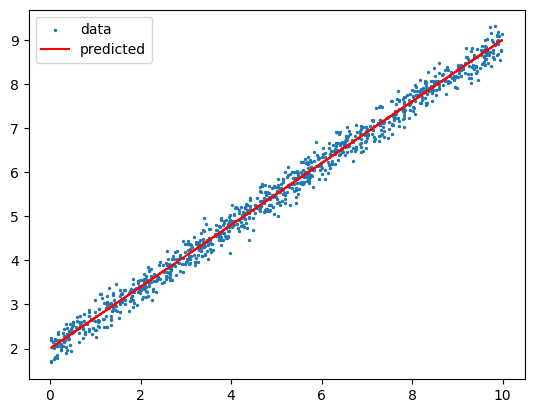

In [26]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

EPOCHS = 500
LEARNING_RATE = 0.02

BATCH_SIZE = 100

num_steps = TOTAL_POINTS // BATCH_SIZE

opt = tf.optimizers.Adam(learning_rate=0.01)

for _ in range(EPOCHS):

    for n_batch in range(num_steps):
        y_batch = y[n_batch*BATCH_SIZE:(n_batch+1)*BATCH_SIZE]
        x_batch = x[n_batch*BATCH_SIZE:(n_batch+1)*BATCH_SIZE]

        with tf.GradientTape() as tape:
            f = x_batch * k + b
            loss = tf.reduce_mean(tf.square( y_batch - f ))
        dk, db = tape.gradient(loss, [k, b])
        # k.assign_sub(dk * LEARNING_RATE)
        # b.assign_sub(db * LEARNING_RATE)
        opt.apply_gradients(zip([dk, db], [k, b]))


print(k, b, sep="\n")

y_pr = x * k + b
plt.scatter(x, y, s=2, label="data")
plt.plot(x, y_pr, color="r", label="predicted")
plt.legend()